## Clarifications

### PyCharm and debugging
I've prepared few slides to show you how to use the debugger (running line by line a program) with PyCharm. 
We won't probably have time to do it here, please if you are interested take a look at home and in case let me know if you have troubles.

### \
As you may have noticed in many programs (especially in the pdf of the lessons) 
I have used a \ inside the lines of code. 
The \ symbol is used to tell python that an instruction is not finished but continues 
in the line below and it is used to fit the code in the width of the pdf and hopefully to
make it more readable.
```python
# this line
log_discount_factors = [log(discount_factor) for discount_factor in discount_factors]

# is equivalent to this one 
log_discount_factors = \
    [log(discount_factor) for discount_factor in discount_factors]
```

### Functions and `return` Value
As we have seen in Practical Lesson 2 functions can return any kind of objects (numbers, strings, lists, complex objects...) but this is not mandatory i.e. you can write a function **without** a ```return``` statement. 

```python 
def printing(mystring):
    print (myString)
```

This is a dummy example to show that a function can just print something to screen.
In addition the syntax of the ```return``` is different from ```Visual Basic```, the returned object needn't have to have the same name as the function (and actually it is better not to to avoid confusion):

```python
# advise AGAINST using this style
def pippo(a):
    pippo = a
    return pippo
```

### `assert`
Forgot to tell you that `assert` can take a second argument with a message to display in case of failure.
```python
assert 1 > 2, "Two is bigger than one"
```

### `import`
Whenever you import one python file into another the code in the global scope of the imported file is run:

```python
# file A.py
def functionA(sumUpTo):
    result = 0
    for i in range(sumUpTo+1):
        result += i
    return result

# this is a test for functionA
assert functionA(5) == 15
print ("Test is OK !")

--------------------------------
# file B.py
from A import functionA

print (functionA(12))
```

In this case when you run file B.py you will see on the screen "Test is OK !" since during the import of A.py whatever is in the global scope (i.e. the code not indented) is run.

In order to avoid this behaviour you can *protect* the code in A.py using the following syntax:

```python
# file A.py
def functionA(sumUpTo):
    result = 0
    for i in range(sumUpTo+1):
        result += i
    return result

# this is a test for functionA
if __name__ == "__main__":
    assert functionA(5) == 15
    print ("Test is OK !")

--------------------------------
# file B.py
from A import functionA

print (functionA(12))
```

Basically the special variable `__name__` takes the value `__main__` if and only if you are running the directly file A.py. Otherwise, importing A.py, it has a different value and the if block is not executed.

# Solutions - Practical Lession 3

## Exercises

### Exercise 3.1

Take the code for the Black‐Scholes formula from exercise 2.3 and wrap it in a function. Then, use this function to calculate the prices of calls with various strikes, using the following data.

```python
s = 800
# strikes expressed as % of spot price
moneyness = [ 0.5, 0.75, 0.825, 1.0, 1.125, 1.25, 1.5 ] 
vol = 0.3
ttm = 0.75
r = 0.005
```

The output should be a dictionary mapping strikes to call prices.

**Solution:**

In [1]:
from math import log, exp, sqrt
from scipy.stats import norm

def d1(S_t, K, r, vol, ttm):
    num = log(S_t/K) + (r + 0.5*pow(vol, 2)) * ttm
    den = vol * sqrt(ttm)
    return num/den

def d2(S_t, K, r, vol, ttm):
    return d1(S_t, K, r, vol, ttm) - vol * sqrt(ttm)

def call(S_t, K, r, vol, ttm):
    return S_t * norm.cdf(d1(S_t, K, r, vol, ttm)) \
       - K * exp(-r * ttm) * norm.cdf(d2(S_t, K, r, vol, ttm))

s = 800
# strikes expressed as % of spot price
moneyness = [ 0.5, 0.75, 0.825, \
             1.0, 1.125, 1.25, 1.5 ]
vol = 0.3
ttm = 0.75
r = 0.005

result = {}
for m in moneyness:
    result[s*m] = call(s, m*s, r, vol, ttm)
result

{400.0: 401.66074527896365,
 600.0: 213.9883852521275,
 660.0: 166.85957363897393,
 800.0: 84.03697017660357,
 900.0: 47.61880394696229,
 1000.0: 25.632722952585738,
 1200.0: 6.655275227771156}

### Exercise 3.2

Python has a useful command called `assert` which can be used for checking that a given
condition is satisfied, and raising an error if the condition is not satisfied.

The following line does not cause an error, in fact it does nothing 
```python
assert 1 < 2
```

This causes an error
```python
assert 1 > 2
```

`assert` can take a second argument with a message to display in case of failure.
```python
assert 1 > 2, "Two is bigger than one"
```
Take the  `df` function from lesson 3 and modify it by adding some assertions to check that:

* the pillar date list contains at least 2 elements;
* the pillar date list is the same length as the discount factor list;
* the first pillar date is equal to the today date;
* the value date argument 'd' is greater or equal to the first pillar date and also less than or equal to the last pillar date.

Then try using the function with some invalid data to make sure that your as
sertions are correctly checking the desired conditions

**Solution:**

In [2]:
# import modules and objects that we need
from datetime import date
import numpy
import math

# define the input data
today_date = date(2017, 10, 1)
pillar_dates = [date(2017, 10, 1), 
                date(2018, 10, 1), 
                date(2019, 10, 1)]
discount_factors = [1.0, 0.95, 0.8]

# define the df function
def df(t):
    ############## CHECKS ################
    # Check that there are at least 2 pillar dates
    assert len(pillar_dates) >= 2, " need at least 2 pillar dates"
    
    # Check that the number of pillar dates 
    #is equal to the number of pillar discount factors
    assert len(pillar_dates) == len(discount_factors), \
        "number of pillar dates should be equal to \
        the number of pillar discount factors"
    
    # Check that the first pillar date is the today date
    assert today_date == pillar_dates[0], \
        "first pillar date should be the today date"
    
    # Check that the value date argument is between 
    #the first and last pillar dates
    assert pillar_dates[0] <= t <= pillar_dates[-1], \
        "Invalid value date %s" % (d)
    ############## END OF CHECKS ################
    
    log_discount_factors = []
    for discount_factor in discount_factors:
        log_discount_factors.append(math.log(discount_factor))
    
    pillar_days = []
    for pillar_date in pillar_dates:
        pillar_days.append((pillar_date - today_date).days)
    
    t_days = (t - today_date).days
    
    interpolated_log_discount_factor = \
        numpy.interp(t_days, pillar_days, log_discount_factors)
    
    return math.exp(interpolated_log_discount_factor)

df(date(2019, 1, 1))

0.9097285910181567

### Exercise 3.3

Python comes with a module called ```matplotlib``` which can be used for plotting graphs
and charts. In particular, we can use a sub‐module called ```pyplot``` which
provides slightly easier‐to‐use interface for plotting interactively.
Use this function to plot the call prices from exercise 3.1

**Solution:**

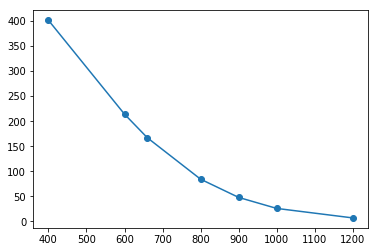

In [4]:
from matplotlib import pyplot

strikes = [s*m for m in moneyness]
call_prices = [call(s, k, r, vol, ttm) for k in strikes]
pyplot.plot(strikes, call_prices, marker='o')
# the next line saves the picture in a file (it is then shown in repl.it)
#pyplot.savefig('graph4.png') 